<a href="https://colab.research.google.com/github/ElenaGordienko1/ML/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/heart_disease.csv')
df['sex'] = df['sex'].astype('object')
y = df['age'] # выбираем целевую переменную (категориальную)
X = df.drop('age', axis=1) # переменные для проверки влияния

Преобразование категориальных переменных остается без изменений

In [3]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [4]:
X

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1
0,4,130,322,0,2,109,0,2.4,2,3,3,1,True
1,3,115,564,0,2,160,0,1.6,2,0,7,0,False
2,2,124,261,0,0,141,0,0.3,1,0,7,1,True
3,4,128,263,0,0,105,1,0.2,2,1,7,0,True
4,2,120,269,0,2,121,1,0.2,1,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.5,1,0,7,0,True
266,2,120,263,0,0,173,0,0.0,1,0,7,0,True
267,2,140,294,0,2,153,0,1.3,2,0,3,0,False
268,4,140,192,0,0,148,0,0.4,2,0,6,0,True


In [5]:
df_corr_test = X.copy()

df_corr_test['y'] = y
df_corr_test

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1,y
0,4,130,322,0,2,109,0,2.4,2,3,3,1,True,70
1,3,115,564,0,2,160,0,1.6,2,0,7,0,False,67
2,2,124,261,0,0,141,0,0.3,1,0,7,1,True,57
3,4,128,263,0,0,105,1,0.2,2,1,7,0,True,64
4,2,120,269,0,2,121,1,0.2,1,1,3,0,False,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.5,1,0,7,0,True,52
266,2,120,263,0,0,173,0,0.0,1,0,7,0,True,44
267,2,140,294,0,2,153,0,1.3,2,0,3,0,False,56
268,4,140,192,0,0,148,0,0.4,2,0,6,0,True,57


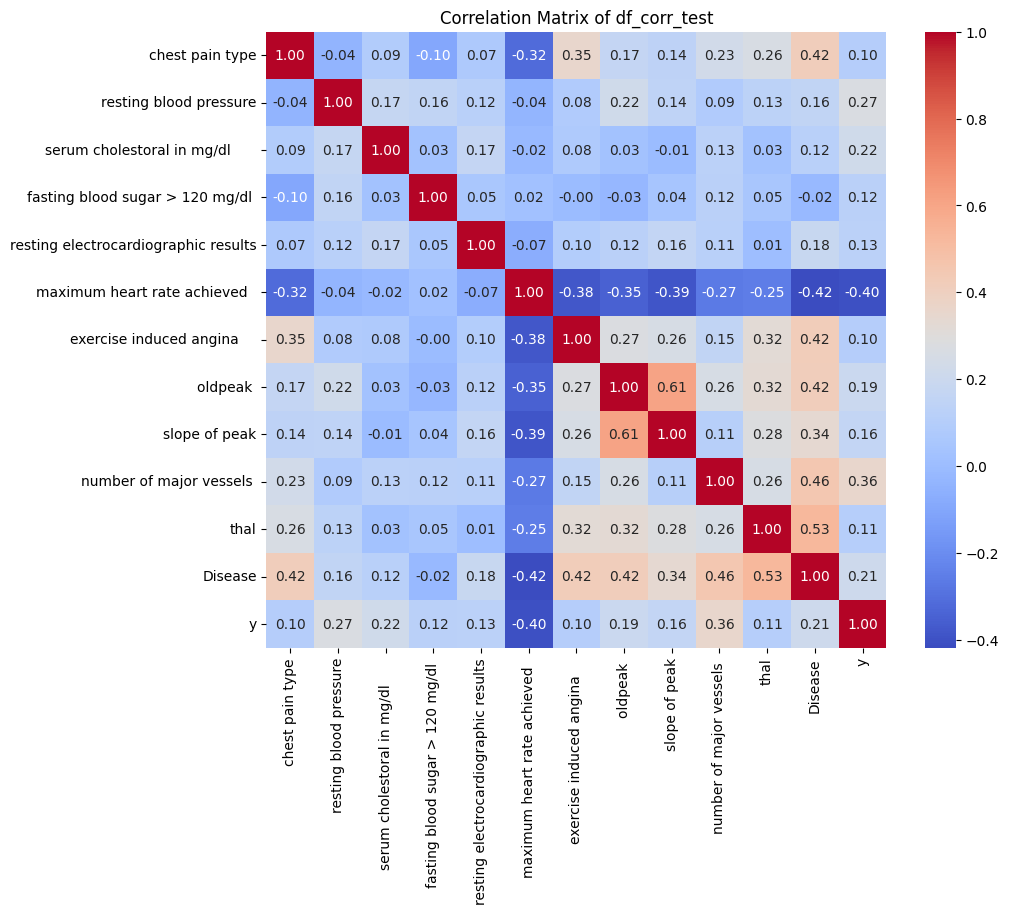

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()
    elif regularization == 'l2':
        model = Ridge()
    else:
        model = LinearRegression()  # Без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [8]:
resolve_regression(X, y)
None


Regularization: None
Mean Absolute Error (MAE): 6.63
Mean Squared Error (MSE): 65.87
R^2 Score: 0.17


In [9]:
resolve_regression(X[['chest pain type', 'Disease', 'resting blood pressure']], y)
None


Regularization: None
Mean Absolute Error (MAE): 6.58
Mean Squared Error (MSE): 69.00
R^2 Score: 0.13


Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [10]:
X

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1
0,4,130,322,0,2,109,0,2.4,2,3,3,1,True
1,3,115,564,0,2,160,0,1.6,2,0,7,0,False
2,2,124,261,0,0,141,0,0.3,1,0,7,1,True
3,4,128,263,0,0,105,1,0.2,2,1,7,0,True
4,2,120,269,0,2,121,1,0.2,1,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.5,1,0,7,0,True
266,2,120,263,0,0,173,0,0.0,1,0,7,0,True
267,2,140,294,0,2,153,0,1.3,2,0,3,0,False
268,4,140,192,0,0,148,0,0.4,2,0,6,0,True


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   chest pain type                       270 non-null    int64  
 1   resting blood pressure                270 non-null    int64  
 2   serum cholestoral in mg/dl            270 non-null    int64  
 3   fasting blood sugar > 120 mg/dl       270 non-null    int64  
 4   resting electrocardiographic results  270 non-null    int64  
 5   maximum heart rate achieved           270 non-null    int64  
 6   exercise induced angina               270 non-null    int64  
 7   oldpeak                               270 non-null    float64
 8   slope of peak                         270 non-null    int64  
 9   number of major vessels               270 non-null    int64  
 10  thal                                  270 non-null    int64  
 11  Disease            

Отбор признаков по корреляции

In [12]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [14]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [15]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 6.38
Mean Squared Error (MSE): 59.25
R^2 Score: 0.25


In [16]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 7.52
Mean Squared Error (MSE): 79.17
R^2 Score: 0.00


Regularization: None
Mean Absolute Error (MAE): 7.52
Mean Squared Error (MSE): 79.17
R^2 Score: 0.00


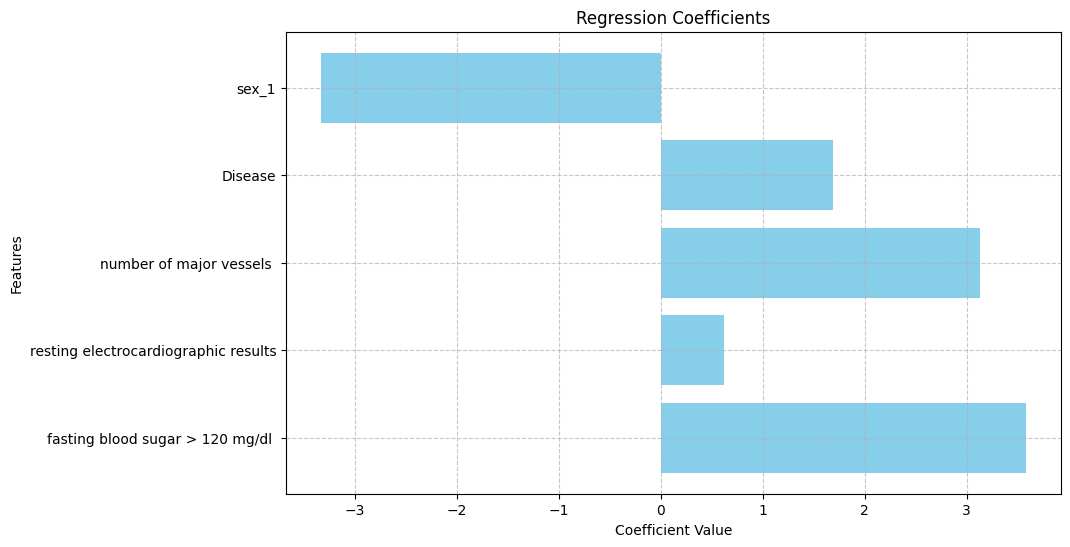

In [17]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Наибольшее влияние на модель оказывают признаки `fasting blood sugar > 120 mg/dl` и `number of major vessels` .

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 7.52 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 79.17 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.00 — модель объясняет 0% дисперсии данных, что указывает на никакущую точность, поэтому думаю модель имеет низкое практическое значение

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [18]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['int']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


<ipython-input-18-4fb28222db12>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [19]:
X_selected_rfe

,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,number of major vessels,Disease,sex_1
0,0.0,1.0,1.000000,1.0,True
1,0.0,1.0,0.000000,0.0,False
2,0.0,0.0,0.000000,1.0,True
3,0.0,0.0,0.333333,0.0,True
4,0.0,1.0,0.333333,0.0,False
...,...,...,...,...,...
265,1.0,0.0,0.000000,0.0,True
266,0.0,0.0,0.000000,0.0,True
267,0.0,1.0,0.000000,0.0,False
268,0.0,0.0,0.000000,0.0,True


Regularization: None
Mean Absolute Error (MAE): 6.38
Mean Squared Error (MSE): 59.25
R^2 Score: 0.25


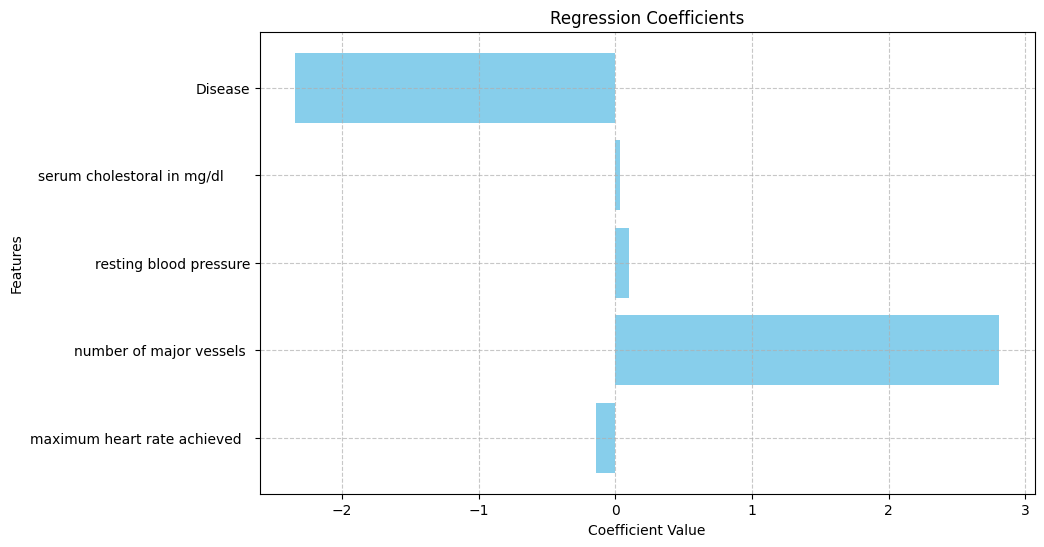

In [26]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_corr, y_selected_corr)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_corr.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Наибольшее влияние на модель оказывают признаки `number of major vessels` .

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 7.52 — средняя разница между предсказанными и фактическими значениями. Модель неточна, значение больше 50%, она ошибается чаще, чем бывает права
- **MSE** (Среднеквадратичная ошибка): 79.17 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.25 — модель объясняет 0.25% дисперсии данных, это лучше, чем 0,однако величина коэффициента детерминации все еще ниже 50 % поэтому  модель имеет низкое практическое значение.

## Пару слов про метрики

In [21]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 7.52
Mean Squared Error (MSE): 79.17
R^2 Score: 0.00


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Резуляризация

In [22]:
X

,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease,sex_1
0,4,130,322,0,2,109,0,2.4,2,3,3,1,True
1,3,115,564,0,2,160,0,1.6,2,0,7,0,False
2,2,124,261,0,0,141,0,0.3,1,0,7,1,True
3,4,128,263,0,0,105,1,0.2,2,1,7,0,True
4,2,120,269,0,2,121,1,0.2,1,1,3,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3,172,199,1,0,162,0,0.5,1,0,7,0,True
266,2,120,263,0,0,173,0,0.0,1,0,7,0,True
267,2,140,294,0,2,153,0,1.3,2,0,3,0,False
268,4,140,192,0,0,148,0,0.4,2,0,6,0,True


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф???????, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

In [23]:
resolve_regression(X, y, regularization='l1')
None


Regularization: l1
Mean Absolute Error (MAE): 6.24
Mean Squared Error (MSE): 59.13
R^2 Score: 0.26


In [24]:
resolve_regression(X, y, regularization='l2')
None


Regularization: l2
Mean Absolute Error (MAE): 6.61
Mean Squared Error (MSE): 65.56
R^2 Score: 0.18


In [25]:
resolve_regression(X, y, regularization=None)
None


Regularization: None
Mean Absolute Error (MAE): 6.63
Mean Squared Error (MSE): 65.87
R^2 Score: 0.17


## KNeighborsRegressor


К-ближайших соседей (K-Nearest Neighbors или просто KNN) — алгоритм классификации и регрессии, основанный на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу.

Алгоритм строится следующим образом:

1) сначала вычисляется расстояние между тестовым и всеми обучающими образцами;

2) далее из них выбирается k-ближайших образцов (соседей), где число k задаётся заранее;

3) итоговым прогнозом среди выбранных k-ближайших образцов будет мода в случае классификации и среднее арифметическое в случае регрессии;

4) предыдущие шаги повторяются для всех тестовых образцов.



Инициализируем модель KNeighborsRegressor для задачи регрессии из sklearn.

In [41]:
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# Средняя абсолютная ошибка
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Среднеквадратическая ошибка
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Коэффициент детерминации R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Mean Absolute Error: 6.529629629629628
Mean Squared Error: 74.50148148148148
R^2 Score: 0.06251048625135913


## DecisionTreeRegressor

DecisionTreeRegressor — это алгоритм машинного обучения для решения задач регрессии. Он строит дерево решений, где каждый узел отвечает за разделение данных на основании одного из признаков, чтобы минимизировать разброс в целевой переменной. Итоговый результат  в каждом листе дерева — это среднее значение целевой переменной для объектов, попавших в этот лист.


Алгоритм работы:

1) Алгоритм анализирует все признаки и значения, чтобы найти оптимальное разделение, которое минимизирует метрику ошибки

2)После первого разделения каждая из подгрупп обрабатывается аналогичным образом.
Процесс продолжается до тех пор, пока:
Не достигнута максимальная глубина дерева (max_depth).
Количество объектов в узле меньше заданного порога (min_samples_split).
Не достигнут критерий минимальной ошибки.

3)Для предсказания нового значения алгоритм проходит по дереву, начиная с корня, и выбирает ветвь в зависимости от значения признаков.
Лист дерева возвращает среднее значение целевой переменной для объектов, попавших в этот лист.


In [55]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42, max_depth=5)  # Ограничиваем максимальную глубину дерева
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# Средняя абсолютная ошибка
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Среднеквадратическая ошибка
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Коэффициент детерминации R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Absolute Error: 7.302136839195662
Mean Squared Error: 90.70972336057615
R^2 Score: -0.14144595187302644


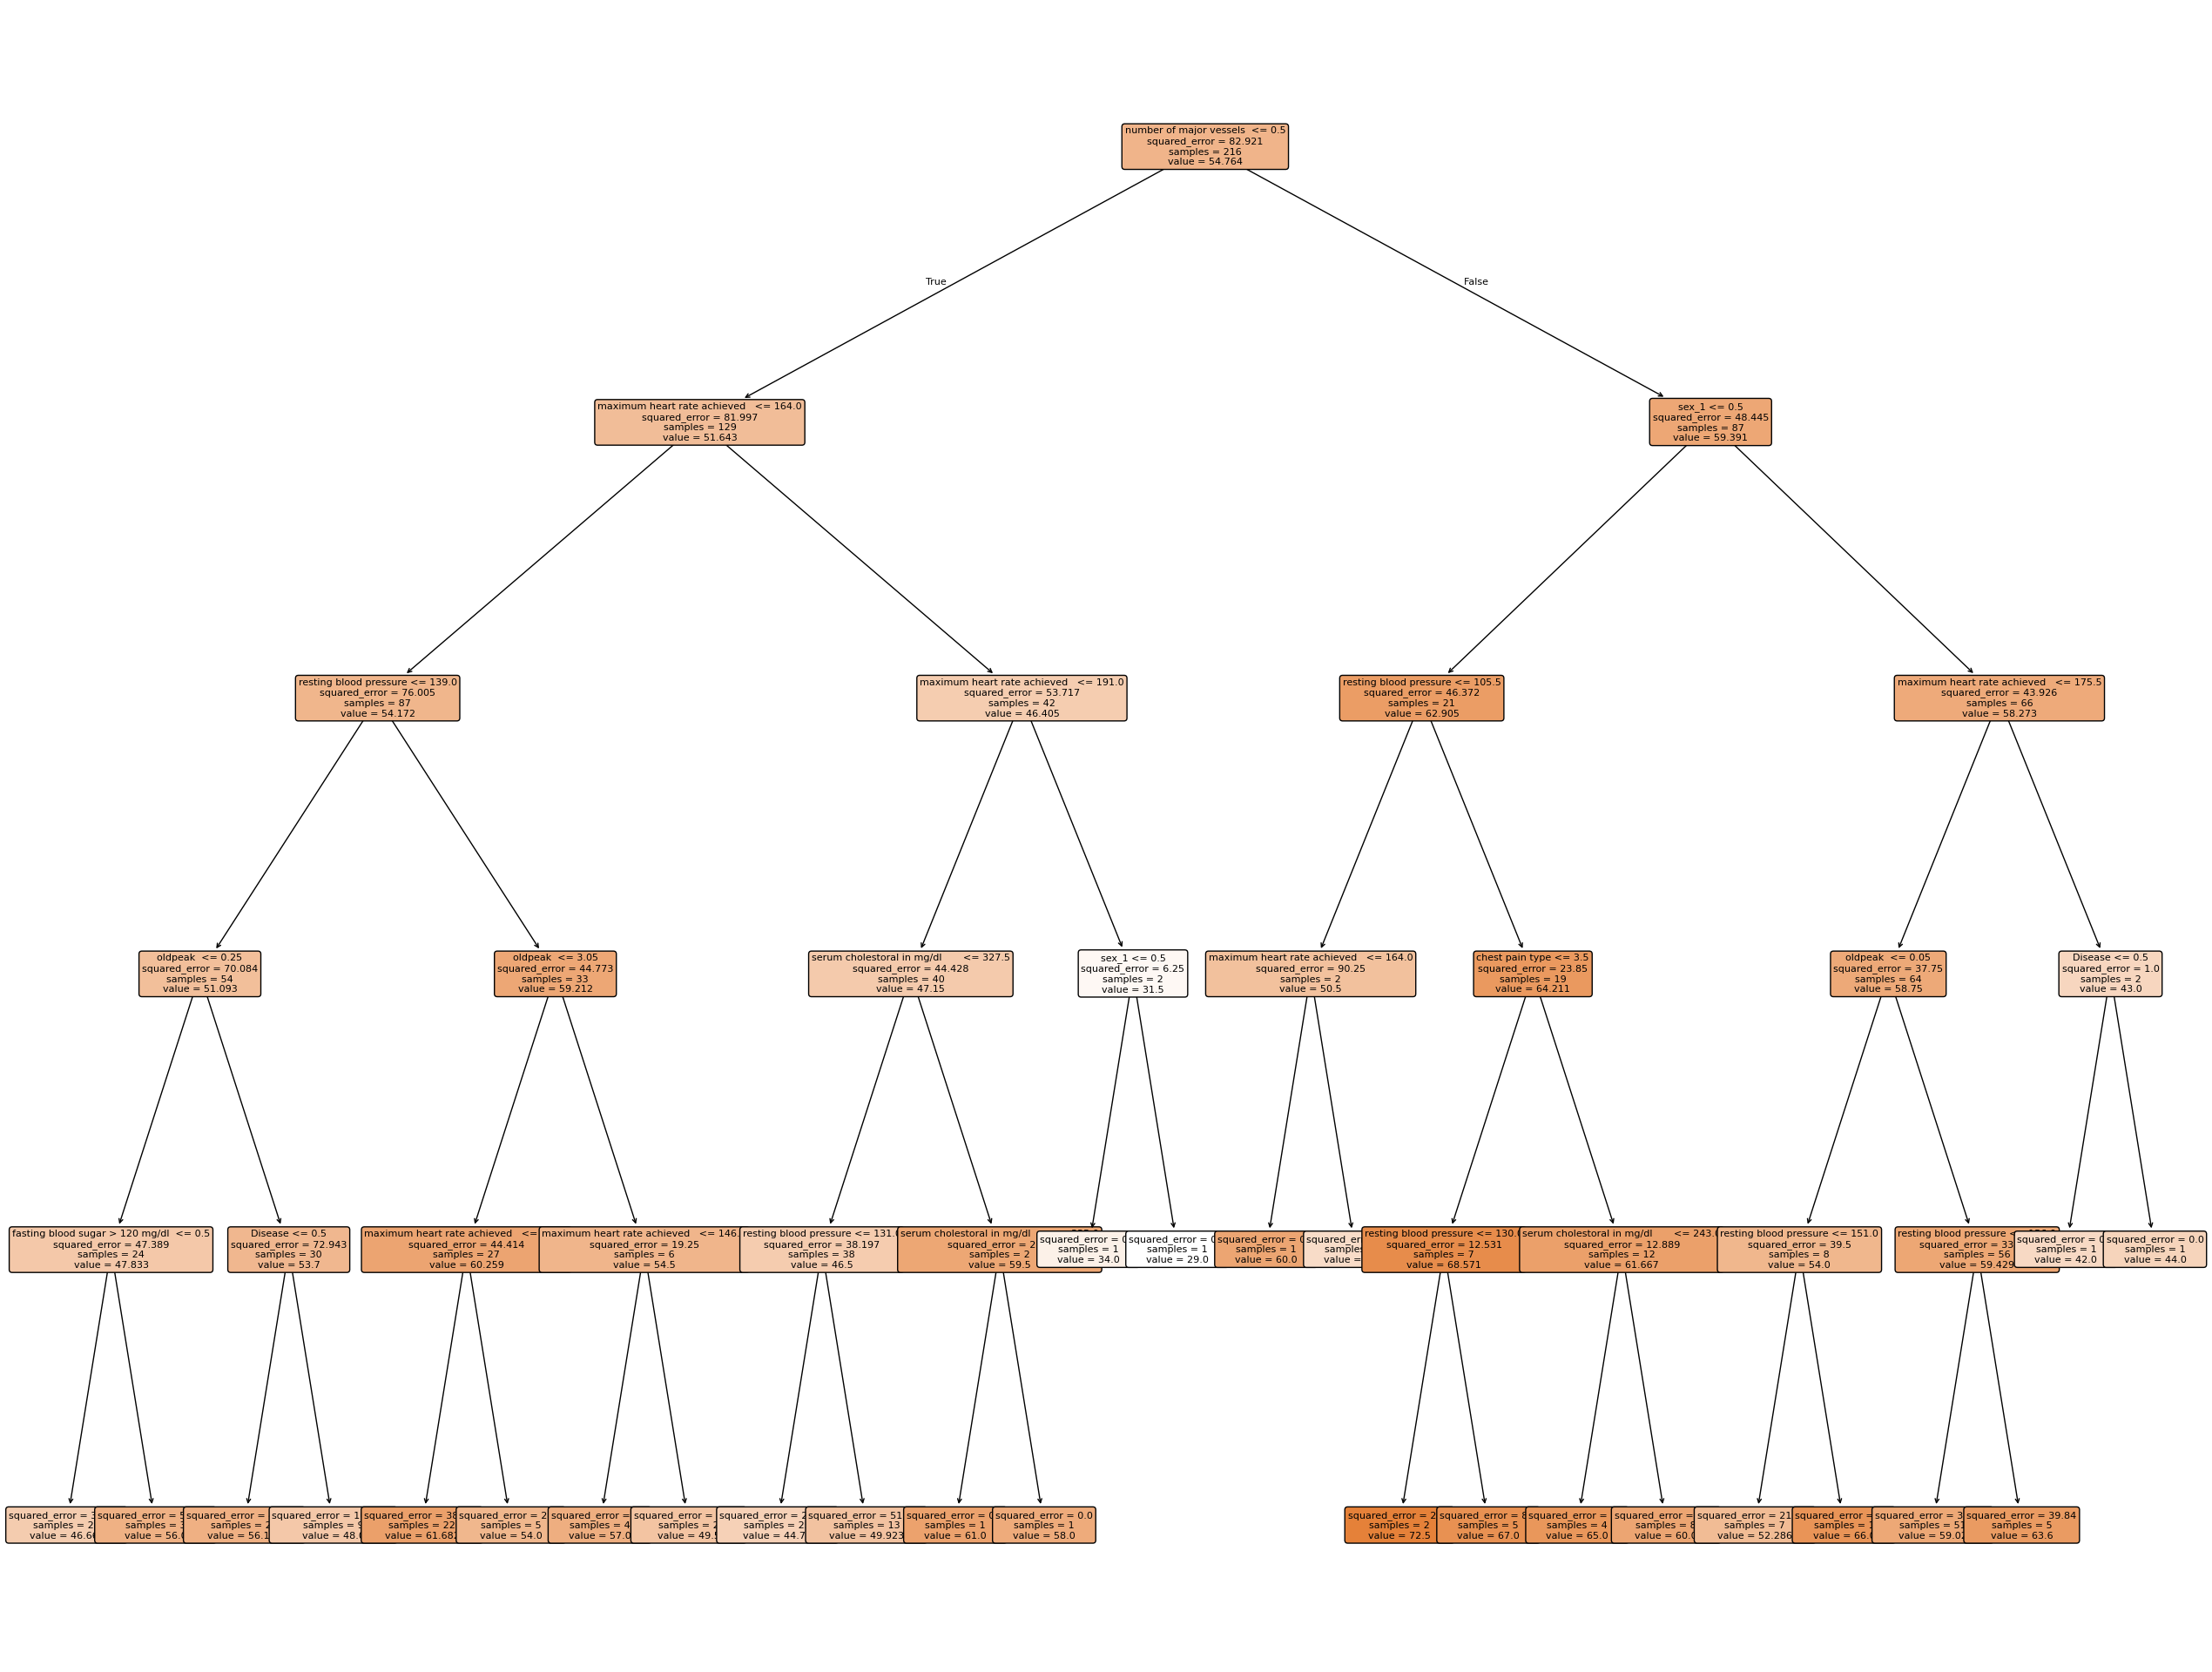

In [56]:

import matplotlib.pyplot as plt

# Визуализируем дерево решений
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, fontsize=8)
plt.subplots_adjust(left=0.1, right=2.6, top=2, bottom=0.1)
plt.show()